In [1]:
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
import cv2

In [2]:
# Load your colored image
image_path = 'DH.jpg'
original_image = Image.open(image_path)

In [3]:
img = original_image.resize((200, 200))  # Resize the input image to 200x200 pixels
img = img.convert('L')  # Convert the image to grayscale (Luminance) mode
img_array = np.array(img)  # Convert the image data to a NumPy array
img_array = img_array.reshape((1, 200, 200, 1))  # Reshape the image array to match the input shape expected by the model (200x200 size, 1 channel)
img_array = img_array / 255.0  # Normalize pixel values to the range [0, 1]
print(img_array.shape)

(1, 200, 200, 1)


In [4]:
# Perform age prediction using model1
model1 = tf.keras.models.load_model('age_model_acc_0.587.h5')
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 97, 97, 64)           3200      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 97, 97, 64)           256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 48, 48, 64)           0         ['batch_normalization[0][0

In [5]:
# Choose the class for which you want to compute the saliency map
class_index = 1  # Replace with the desired class index

In [6]:
# Create a gradient tape to compute gradients
img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)
with tf.GradientTape() as tape:
    tape.watch(img_tensor)
    predictions = model1(img_tensor)
    class_score = predictions[0, class_index]

In [7]:
# Calculate the gradients of the class score with respect to the input image
gradients = tape.gradient(class_score, img_tensor)

In [8]:
# Normalize the gradients
normalized_gradients = gradients / (tf.sqrt(tf.reduce_mean(tf.square(gradients))) + 1e-5)

In [9]:
# Compute the saliency map
saliency_map = tf.reduce_sum(normalized_gradients * img_tensor, axis=-1)

In [10]:
# Normalize the saliency map
normalized_saliency_map = (saliency_map - tf.reduce_min(saliency_map)) / (tf.reduce_max(saliency_map) - tf.reduce_min(saliency_map))

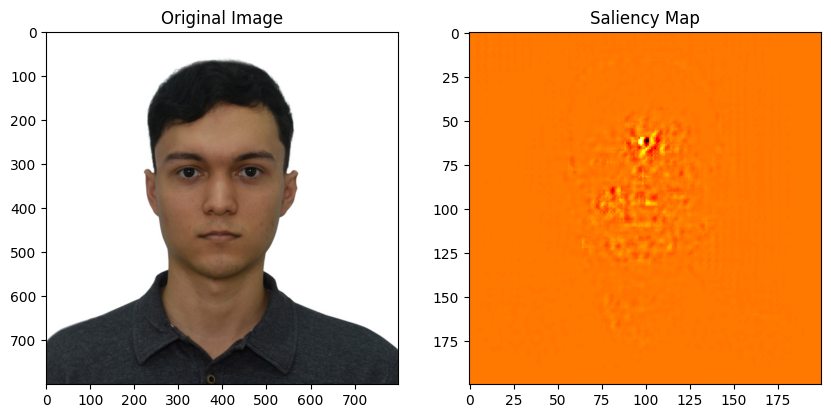

In [11]:
# Visualize the saliency map
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(normalized_saliency_map[0], cmap='hot')
plt.title('Saliency Map')

plt.show()